In [2]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [4]:
file=pd.read_csv('trainng_file.csv')

file.describe

<bound method NDFrame.describe of             Time  Price_open  Price_high   Price_low  Price_close    FIB_1_MA  \
0      3/16/2012    2.352471    2.392664    2.321998     2.348998    2.055048   
1      3/19/2012    2.350735    2.354665    2.302664     2.334998    2.060592   
2      3/20/2012    2.342866    2.346664    2.304665     2.328498    2.065897   
3      3/21/2012    2.335682    2.353331    2.306665     2.333164    2.071189   
4      3/22/2012    2.334423    2.343330    2.286664     2.313664    2.075991   
...          ...         ...         ...         ...          ...         ...   
2962  12/22/2023  252.612938  258.220000  251.370000   254.722500  238.232220   
2963  12/26/2023  253.667719  257.970000  252.910000   255.495000  238.574057   
2964  12/27/2023  254.581360  263.340000  254.581360   260.162500  239.001551   
2965  12/28/2023  257.371930  265.130000  252.710000   258.670000  239.391025   
2966  12/29/2023  258.020965  258.020965  247.430000   251.550000  239.6317

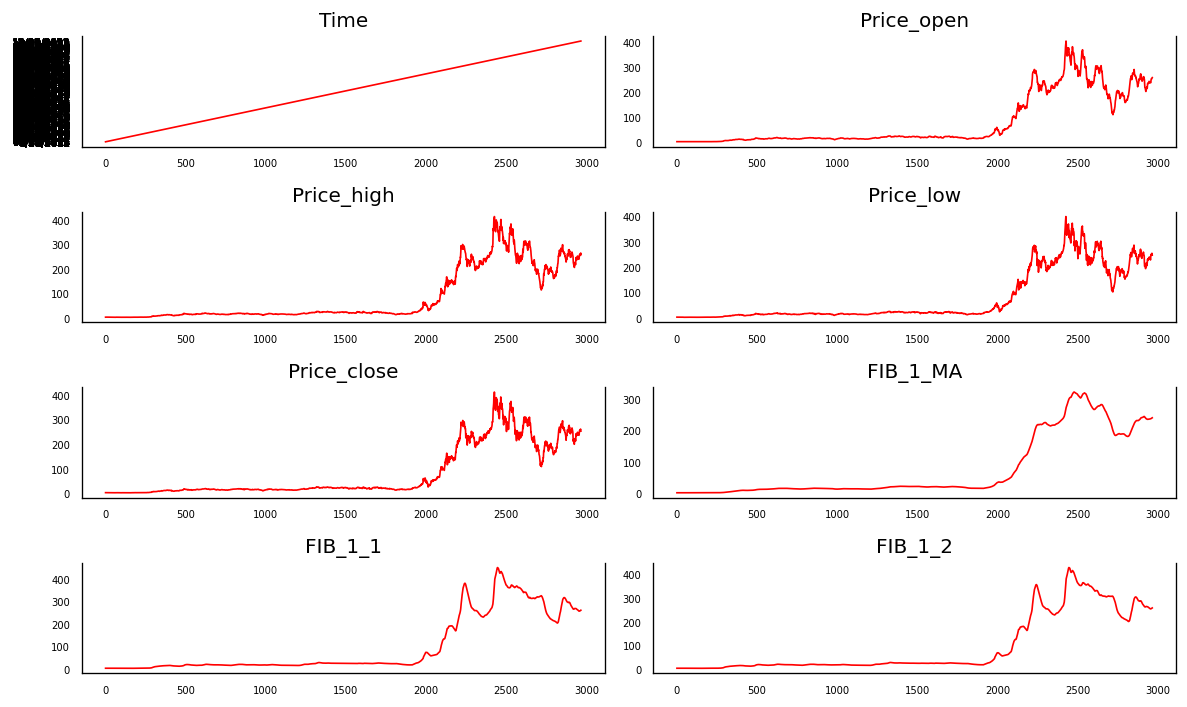

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = file[file.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(file.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [14]:
file.columns

Index(['Time', 'Price_open', 'Price_high', 'Price_low', 'Price_close',
       'FIB_1_MA', 'FIB_1_1', 'FIB_1_2', 'FIB_1_3', 'FIB_1_4', 'FIB_1_5',
       'FIB_1_6', 'FIB_1_7', 'FIB_1_8', 'FIB_1_9', 'FIB_1_10', 'FIB_1_11',
       'FIB_1_12', 'FIB_2_MA', 'FIB_2_1', 'FIB_2_2', 'FIB_2_3', 'FIB_2_4',
       'FIB_2_5', 'FIB_2_6', 'FIB_2_7', 'FIB_2_8', 'FIB_2_9', 'FIB_2_10',
       'FIB_2_11', 'FIB_2_12', 'TS4_level_0', 'TS4_level_1', 'TS4_level_2',
       'TS4_Target', 'TS4_level_4', 'TS4_level_5', 'RSHVB_Middle', 'RSHVB_Up ',
       'RSHVB_Down ', 'JFPCC_Plot', 'T3V_Velocity', 'RSI_MA', 'RSI_Spot',
       'MFI_Spot', 'MFI_MA', 'Senti_Spot', 'Accum_Plot', 'BBWP_Spot',
       'BBWP_MA', 'DMI_Hist', 'DMI_Spot', 'DMI_MA', 'DMI_ADX', 'PMAR_Spot',
       'PMAR_MA', 'Sorch_K', 'Sorch_D', 'WT_Spot', 'WT_MA', 'WT_Hist',
       'VRSI_1', 'VRSI_2', 'VRSI_3', 'VRSI_MA', 'VRSI_4', 'TTF_Slow_Up',
       'TTF_MA', 'TTF_Spot', 'TTF_Slow_Mid', 'PtoE_Spot', 'PtoB_Spot',
       'PtoCF_Spot', 'PtoS_Spot', 'SQZM_

In [15]:
ad_fuller_result_1 = adfuller(file['TS4_Target'].diff()[1:])

print('realgdp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(file['FIB_1_2'].diff()[1:])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(file['Price_high'].diff()[1:])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(file['Price_low'].diff()[1:])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realgdp
ADF Statistic: -9.857869973221293
p-value: 4.310988137277596e-17

---------------------

realcons
ADF Statistic: -7.968841107139183
p-value: 2.816822654212165e-12

---------------------

realcons
ADF Statistic: -10.443298397248235
p-value: 1.5024508619937893e-18

---------------------

realcons
ADF Statistic: -9.950256470812885
p-value: 2.5257952889251508e-17


In [18]:
print('rgnp causes ulc?\n')
print('------------------')
granger_1 = grangercausalitytests(file[['TS4_Target', 'Price_low']], 4)

print('\nulc causes rgnp?\n')
print('------------------')
granger_2 = grangercausalitytests(file[['Price_low', 'Price_high']], 4)

print('rgnp causes ulc?\n')
print('------------------')
granger_1 = grangercausalitytests(file[['FIB_1_1', 'TS4_Target']], 4)

print('rgnp causes ulc?\n')
print('------------------')
granger_1 = grangercausalitytests(file[['FIB_1_2', 'FIB_1_1']], 4)

rgnp causes ulc?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4932.5019, p=0.0000  , df_denom=2963, df_num=1
ssr based chi2 test:   chi2=4937.4960, p=0.0000  , df=1
likelihood ratio test: chi2=2906.9498, p=0.0000  , df=1
parameter F test:         F=4932.5019, p=0.0000  , df_denom=2963, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=526.7900, p=0.0000  , df_denom=2960, df_num=2
ssr based chi2 test:   chi2=1055.3598, p=0.0000  , df=2
likelihood ratio test: chi2=902.8258, p=0.0000  , df=2
parameter F test:         F=526.7900, p=0.0000  , df_denom=2960, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=63.6458 , p=0.0000  , df_denom=2957, df_num=3
ssr based chi2 test:   chi2=191.3895, p=0.0000  , df=3
likelihood ratio test: chi2=185.4641, p=0.0000  , df=3
parameter F test:         F=63.6458 , p=0.0000  , df_denom=2957, df_num=3

Granger Causality
number of lags (no zero) 4


In [6]:
macro_data = file[['TS4_Target', 'Price_low','Price_high']]
print(macro_data.shape)

(2967, 3)


In [8]:
train_df=macro_data[:-12]
test_df=macro_data[-12:]

In [9]:
model = VAR(train_df.diff()[1:])

In [10]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        6.215       6.221       500.3       6.217
1        2.213       2.237       9.141       2.222
2        1.696       1.739       5.453       1.712
3        1.539       1.600       4.661       1.561
4        1.425       1.505       4.159       1.454
5        1.339       1.437       3.815       1.374
6        1.294       1.410       3.647       1.336
7        1.250       1.385       3.491       1.299
8        1.205      1.358*       3.337       1.260
9        1.189       1.360       3.283       1.251
10       1.178       1.368       3.248       1.246
11       1.161       1.369       3.192       1.236
12       1.155       1.381       3.173       1.236
13       1.122       1.367       3.072       1.211
14       1.109       1.372       3.032       1.204
15       1.108       1.389       3.027       1.209
16       1.097       1.396     

In [11]:
var_model = VARMAX(train_df, order=(4,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                                       Statespace Model Results                                      
Dep. Variable:     ['TS4_Target', 'Price_low', 'Price_high']   No. Observations:                 2955
Model:                                                VAR(4)   Log Likelihood              -14212.991
                                                 + intercept   AIC                          28515.981
Date:                                       Tue, 27 Feb 2024   BIC                          28785.588
Time:                                               19:58:36   HQIC                         28613.033
Sample:                                                    0                                         
                                                      - 2955                                         
Covariance Type:                                         opg                                         
Ljung-Box (L1) (Q):           0.34, 0.34, 5.55   Jarque-Bera (JB):   16725.73, 722

In [42]:
n_forecast = 30
#stdt=pd.to_datetime("2024-01-10")
#eddt=pd.to_datetime("2024-02-16")

predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)
#predict = fitted_model.get_prediction(start=stdt,end=eddt )#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [43]:
predictions.columns=['TS4_Target_preduct','Price_low_preduct','Price_high_preduct']
predictions['TS4_Target_preduct']

2955    239.055694
2956    237.860652
2957    236.946640
2958    236.288642
2959    235.791093
2960    235.389329
2961    235.062198
2962    234.812154
2963    234.643517
2964    234.552187
2965    234.526645
2966    234.553425
2967    234.621127
2968    234.721391
2969    234.848119
2970    234.996473
2971    235.162316
2972    235.342064
2973    235.532707
2974    235.731817
2975    235.937486
2976    236.148230
2977    236.362883
2978    236.580522
2979    236.800419
2980    237.021996
2981    237.244805
2982    237.468496
2983    237.692800
2984    237.917509
Name: TS4_Target_preduct, dtype: float64

<AxesSubplot: >

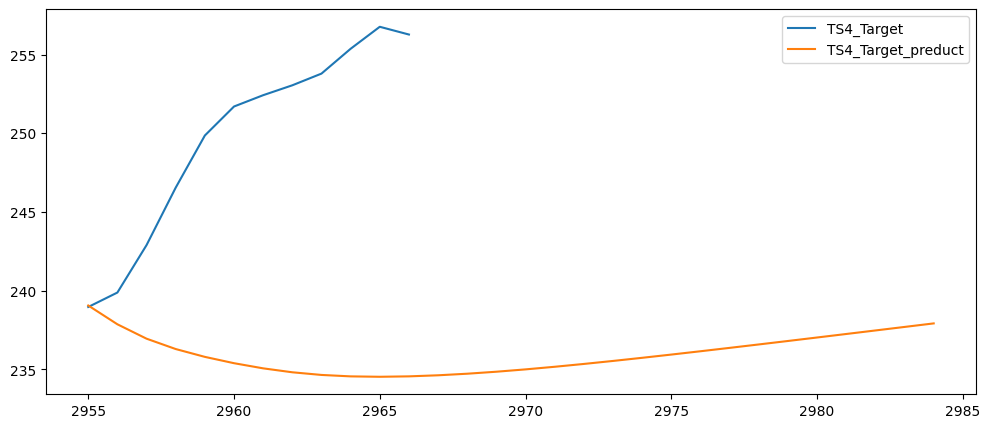

In [45]:
test_vs_pred=pd.concat([test_df['TS4_Target'],predictions['TS4_Target_preduct']],axis=1)
test_vs_pred.plot(figsize=(12,5))

In [23]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_tar=math.sqrt(mean_squared_error(predictions['TS4_Target_preduct'],test_df['TS4_Target']))
print('Mean value of ULC is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['TS4_Target']),rmse_tar))

# rmse_rgnp=math.sqrt(mean_squared_error(predictions['rgnp_predicted'],test_df['rgnp']))
# print('Mean value of RGNP is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['rgnp']),rmse_rgnp))

Mean value of ULC is : 249.7884725. Root Mean Squared Error is :15.830542968785743
